# Comparison of reinforcement learning algorithms for Nim game

Algorithms implemented:
* Minimax algorithm with alpha beta pruning
* Q-learning
* SARSA

In [1]:
from nim import *
from qlearning import *
from sarsa import *

We decided to compare them in 3 different ways:
* by playing one against the other and counting the number of wins
* by playing against smart and random opponents
* by analysing the training time or the time it takes for them to make a move
* by analysing how good they are at finding the optimal strategy

We didn't put much emphasis on parameter tuning. Chosen parameters were based on literature:
* for Q-learning and SARSA: http://www.diva-portal.org/smash/get/diva2:814832/FULLTEXT01.pdf

### 1. Playing one against the other

First let's compare Q-learning and SARSA algorithms since they're very similar.

We compare them by letting them play against eachother n times. Each time we generate a game with random number of piles (between 1 and 10) each pile with a random number of coins (between 1 and 10) and train both algorithms 10 000 times. Then we choose randomly which algorithm will have the first move and let them play. We keep track of the number of wins for each algorithm.

In [2]:
from play import *

In [5]:
# this will take approx. 25 seconds
print("After playing for 20 times the amounts of wins are: " + str(qlearn_vs_sarsa(20)))

After playing for 20 times the amounts of wins are: {'Q-learning': 13, 'SARSA': 7}


In [6]:
print("After playing for 100 times the amounts of wins are: " + str(qlearn_vs_sarsa(100)))

After playing for 100 times the amounts of wins are: {'Q-learning': 44, 'SARSA': 56}


Now we compare Minimax algorithm with Q-learning and SARSA.

In [5]:
from play import *
print(alg_vs_minimax(Qlearning(0.5, 0.5,0.8), 20))
print(alg_vs_minimax(SarsaAlgorithm(0.5, 0.8), 20))


{'Other algorithm': 10, 'Minimax': 10}
{'Other algorithm': 9, 'Minimax': 11}


In [4]:
# todo več primerov? q-learning in sarsa se lahko sproba z različnimi kombinacijami parametrov.. npr v zgornjem članku je napisano da se najbolš obnesejo 
# # α = {0.1, 0.5, 0.99}, γ = {0.1, 0.5, 1} and ε = {0.2, 0.8}

### 2. Playing against random or smart opponents 

Algorithms were succesful against random opponent.

For being succesful against a smart opponent more trainings were neccesary. Of course playing against smart opponent only makes sense if our algorithm makes the first move (otherwise smart opponent will always win).

In [2]:
from play import random_opponent_minimax, random_opponent, smart_opponent

In [4]:
# funkcija random_opponent je naštimana da natrenira 10000
# TODO na kateri postavitvi pilesov ti dela sploh random_opponent?
print(random_opponent(100, Qlearning(0.5, 1, 0.2)))
print(random_opponent(100, SarsaAlgorithm(0.5, 0.8)))

{'ai': 97, 'random opponent': 3}
{'ai': 79, 'random opponent': 21}


In [7]:
print(random_opponent_minimax(20))

{'Random opponent': 8, 'Minimax': 12}


Against the smart opponent they weren't so succesful.

In [3]:
# tukej je spet neka fiksna postavitev naštimana ....
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 10000, optimal_moves=True))
print(smart_opponent(10, SarsaAlgorithm(0.5, 0.8), 10000, optimal_moves=True))
# tukej naprinta število zmag in pa seznam količnikov (koliko 'zmagovalnih' potez je naredil)/(kolikokrat bi lahko naredil zmagovalno potezo)

{'ai': 0, 'smart opponent': 10}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'ai': 0, 'smart opponent': 10}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


What if we train them 10x more?

In [4]:
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 100000, optimal_moves=True))
print(smart_opponent(10, SarsaAlgorithm(0.5, 0.8), 100000, optimal_moves=True))

{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 0, 'smart opponent': 10}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [5]:
print(smart_opponent(10, SarsaAlgorithm(0.5, 0.8), 1000000, optimal_moves=True))

{'ai': 0, 'smart opponent': 10}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 10000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 20000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 30000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 40000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 50000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 60000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 70000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 80000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 90000, optimal_moves=True))
print(smart_opponent(10, Qlearning(0.5, 1, 0.2), 100000, optimal_moves=True))

{'ai': 9, 'smart opponent': 1}
[1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 0, 'smart opponent': 10}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
{'ai': 10, 'smart opponent': 0}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [8]:
print(smart_opponent(10, SarsaAlgorithm(0.5, 0), 100000, optimal_moves=True))

{'ai': 0, 'smart opponent': 10}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### 3. Times

Q-learning and SARSA can be compared by the time it takes for them to train. Minimax can be compared by average time it takes for it to make a move.

For time analysis of minimax we made the algorithm play 3 games with a random opponent with 3, 5, 10 or 15 piles of 10 coins. For each set of piles we save the time for each move in a list of lists list all_times, we also calculated the average time it took the algorithm to make a move and the all together time it took to finish the games.

TODO Barbara plis poglej če se ti zdi tko ok analiza, ali bi ti kako drugače?

In [ ]:
from play import random_opponent_minimax

piles = [3*[10], 5*[10], 10*[10], 15*[10]]
all_times = []
for pile in piles:
    all_times.append(random_opponent_minimax(3, pile, timing=True))
    # vrne seznam časov ki jih je izmeril za vsako potezo

print(all_times)

In [6]:
all_times = [[0.11799860000610352, 0.04900336265563965, 0.019999265670776367, 0.003997802734375, 0.003001689910888672, 0.0, 0.14699912071228027, 0.04600214958190918, 0.019997119903564453, 0.008000612258911133, 0.0009987354278564453, 0.0, 0.14400124549865723, 0.07199883460998535, 0.017002344131469727, 0.001998424530029297, 0.0], [0.8349997997283936, 0.6889989376068115, 0.44300222396850586, 0.29599833488464355, 0.17000341415405273, 0.13399600982666016, 0.07600116729736328, 0.053003549575805664, 0.029996871948242188, 0.025002717971801758, 0.0019974708557128906, 0.8590013980865479, 0.4829988479614258, 0.206129789352417, 0.06800007820129395, 0.06400108337402344, 0.028002500534057617, 0.0, 0.644995927810669, 0.39100098609924316, 0.2180004119873047, 0.09400010108947754, 0.042999982833862305, 0.030004262924194336, 0.0019953250885009766, 0.0], [8.938133478164673, 7.114443302154541, 5.825999021530151, 5.1780006885528564, 4.583169221878052, 3.3809993267059326, 2.9380016326904297, 1.640000343322754, 1.1609997749328613, 0.7399992942810059, 0.43400001525878906, 0.32400035858154297, 0.10900330543518066, 0.045995473861694336, 0.026000022888183594, 0.006000041961669922, 0.0, 0.0, 9.290575981140137, 7.945332050323486, 6.88726806640625, 5.746015310287476, 4.447332382202148, 3.476571559906006, 2.5030455589294434, 1.3979949951171875, 0.9670109748840332, 0.7790100574493408, 0.6110002994537354, 0.47299933433532715, 0.3959989547729492, 0.29400110244750977, 0.13300013542175293, 0.025998830795288086, 0.013000011444091797, 0.0009999275207519531, 0.0, 7.765528440475464, 6.00212836265564, 3.816054344177246, 3.238064765930176, 2.4830844402313232, 1.4080100059509277, 1.4240186214447021, 0.5969979763031006, 0.430011510848999, 0.3660109043121338, 0.3150522708892822, 0.24099302291870117, 0.09200048446655273, 0.04900002479553223, 0.025998830795288086, 0.010000228881835938, 0.008999347686767578, 0.009001493453979492, 0.0], [35.68765711784363, 27.178805589675903, 21.299304962158203, 19.313388109207153, 14.72127103805542, 10.716106414794922, 8.83448576927185, 8.493103504180908, 7.8442933559417725, 5.6950788497924805, 4.285691976547241, 3.881269931793213, 3.2487261295318604, 2.449455976486206, 2.027040719985962, 1.4410102367401123, 0.7291481494903564, 0.4090101718902588, 0.35700249671936035, 0.10899710655212402, 0.06800079345703125, 0.009998798370361328, 0.0010023117065429688, 0.0, 31.673207759857178, 27.19913101196289, 25.7500319480896, 20.934261560440063, 18.92941427230835, 17.52362608909607, 16.188398122787476, 15.660614728927612, 14.201453685760498, 12.302765130996704, 10.9162278175354, 8.325143098831177, 6.410076141357422, 4.760732650756836, 3.144550085067749, 2.2343201637268066, 2.1910171508789062, 1.945000171661377, 1.1520180702209473, 0.512000560760498, 0.36299967765808105, 0.2999997138977051, 0.24600005149841309, 0.13700032234191895, 0.07799935340881348, 0.04900312423706055, 0.0319972038269043, 0.018001317977905273, 0.009998559951782227, 0.00500035285949707, 0.0, 28.464274883270264, 25.59438157081604, 20.614317417144775, 18.41473412513733, 13.03892731666565, 9.746610879898071, 9.53210711479187, 7.3025782108306885, 6.08343505859375, 4.75753927230835, 3.1810102462768555, 2.664130210876465, 2.2734134197235107, 1.8865256309509277, 1.333009958267212, 1.2092304229736328, 1.0760111808776855, 1.0168519020080566, 0.8525505065917969, 0.4660000801086426, 0.19304943084716797, 0.1250002384185791, 0.06401228904724121, 0.04799914360046387, 0.030997753143310547, 0.02000117301940918, 0.011999368667602539, 0.005002021789550781, 0.0]]

In [7]:
# print(all_times)
avg_times = []
T = []
for times in all_times:
    avg = sum(times) / len(times)
    avg_times.append(avg)
    T.append(sum(times))
avg_times # for 3, 5, 10, 15 
T


[0.6509993076324463, 5.884131193161011, 116.11285591125488, 581.9975402355194]

Continue with qlearning and sarsa where we have to take into consideration the number of trainigns

In [3]:
import time 

num_trainings = [100, 1000, 10000, 50000]  # če dodam 100000 ali 20*[10] traja čist predolgo
piles = [3*[10], 5*[10], 10*[10], 15*[10]]

In [ ]:
times_q, times_s = dict(), dict()
for t in num_trainings:
    for pile in piles:
        start = time.time()
        train_model(t, Qlearning(0.5, 1, 0.2), pile)
        end = time.time()
        times_q[(t, len(pile))] = end-start
        print("naslednji")

In [1]:
# print(times_q)

times_q = {(100, 3): 0.020014286041259766, (100, 5): 0.05799722671508789, (100, 10): 0.2070000171661377, (100, 15): 0.49500060081481934, (1000, 3): 0.1779956817626953, (1000, 5): 0.46752095222473145, (1000, 10): 2.177372932434082, (1000, 15): 4.991068124771118, (10000, 3): 1.4810168743133545, (10000, 5): 4.433451414108276, (10000, 10): 22.93538737297058, (10000, 15): 59.3717303276062, (50000, 3): 6.724517583847046, (50000, 5): 22.678982973098755, (50000, 10): 113.47926378250122, (50000, 15): 338.30013370513916}

In [ ]:
times_s = dict()
for t in num_trainings:
    for pile in piles:
        start = time.time()
        train_model(t, SarsaAlgorithm(0.5, 0.8, 0.5), pile)
        end = time.time()
        times_s[(t, len(pile))] = end-start
        print("naslednji")

In [2]:
# print(times_s)

times_s = {(100, 3): 0.0169985294342041, (100, 5): 0.03400111198425293, (100, 10): 0.1289980411529541, (100, 15): 0.27901744842529297, (1000, 3): 0.14100027084350586, (1000, 5): 0.38901638984680176, (1000, 10): 1.3630082607269287, (1000, 15): 2.929166555404663, (10000, 3): 1.4014134407043457, (10000, 5): 3.754772901535034, (10000, 10): 15.064005136489868, (10000, 15): 33.72049355506897, (50000, 3): 7.838032007217407, (50000, 5): 19.084083080291748, (50000, 10): 88.54480719566345, (50000, 15): 197.60774683952332}

Let's plot!

In [8]:
x1, y1, z1 = [], [], []

for key in times_q:
    x1.append(key[0])
    y1.append(key[1])
    z1.append(times_q[key])

x2, y2, z2 = [], [], []

for key in times_s:
    x2.append(key[0])
    y2.append(key[1])
    z2.append(times_s[key])

x3, y3, z3 = [], [3, 5, 10, 15], []
for elt in T:
    x3.append(0)
    z3.append(elt)

<Figure size 432x288 with 0 Axes>

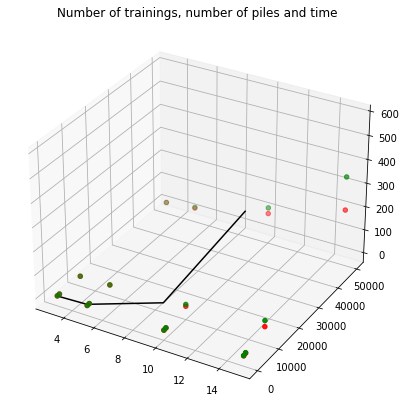

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
 
# creating an empty canvas
fig = plt.figure()
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
# axx = plt.axes(projection="3d")
 
# creating a wide range of points x,y,z
# ax.plot3D(y1, x1, z1, 'red')
# ax.plot3D(y2, x2, z2, 'blue')
# axx.plot3D(y3, x3, z3, 'black')

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(y1, x1, z1, color = "green")
ax.scatter3D(y2, x2, z2, color = "red")
ax.plot3D(y3, x3, z3, color = "black") # tole je za minimax - dala sem kot 0 treningov
plt.title("Number of trainings, number of piles and time")
 
# show plot
plt.show()


nič se glih ne vidi :(

### 4. Recognizing winning strategy

Next we will compare algorithms according to how many times they chose an optimal move. Optimal move or the winning strategy for the game where the winner is the player who takes the last coin in Nim is when you finish every move with nim-sum 0. 

For the 'misere' Nim (where the player who takes the last coin loses) it's slightly different at the end when there is only one pile left with more than one coin - let's say that pile has n coins. The goal for the player is to either remove n or n-1 coins from that pile so that there is an odd number of piles with 1 coin - so that the other player will be forced to take the last coin.

How to calculate nim-sum? First we write the number of coins in each pile as a binary number. Then we sum the numbers BUT no carrying is used. For example we write the numbers beneath eachother and underneath each column we write 1 if the sum is odd or 0 if the sum is even.

For example:

0   1	0

0   1	1

1	0	0

====

1	0	1

The ordinary sum of numbers 2, 3 and 4 is 9, but their Nim sum is 101 which is 5.

The goal for the algorithm to learn is to finish every move with nim-sum 0 (except at the end).

First let's write a function that takes a state in Nim (list of numbers of coins in each pile) and returns their nim-sum.v

In [1]:
# from play import nimsum, make_smart_move, check_optimal

def determine_ratio(result):
    a, b = 0,0
    for elt in result:
        a += elt[0]
        b += elt[1]
    if a != 0:
        return b / a
    else:
        return 0

Run 200 games against random opponent for different parameters and measure how ratios of how many times they decide to make a smart move compared to how many times a smart move was available. 

In [2]:
#  α = {0.1, 0.5, 0.99}, γ = {0.1, 0.5, 1} and ε = {0.2, 0.8}

from qlearning import *

q1 = Qlearning(0.1, 0.5, 0.2, smart=True)
q2 = Qlearning(0.5, 0.5, 0.2, smart=True)
q3 = Qlearning(0.1, 1, 0.2, smart=True)
q4 = Qlearning(0.5, 1, 0.2, smart=True)
q5 = Qlearning(0.1, 0.5, 0.8, smart=True)
q6 = Qlearning(0.5, 0.5, 0.8, smart=True)
q7 = Qlearning(0.1, 1, 0.8, smart=True)
q8 = Qlearning(0.5, 1, 0.8, smart=True)

Q = [q1, q2, q3, q4, q5, q6, q7, q8]

num_trainings = [500, 1000, 2500, 5000, 7500, 10000, 12500, 15000]


In [9]:
from play import *
a = random_opponent(10, q1, 10000, piles=[1, 3, 5, 7], optimal_moves=True)
b = smart_opponent(10, q1, 100000, piles=[1, 3, 5], optimal_moves=True)

{'ai': 10, 'random opponent': 0}
{'ai': 10, 'smart opponent': 0}


In [ ]:
from play import *
from nim import *
from qlearning import switch_state

results =dict()
for i in range(len(Q)):
    for t in num_trainings:
        p = generate_piles(5, 10)
        a = random_opponent(500, Q[i], t, p, optimal_moves=True)
        result = determine_ratio(a)
        results[(i,t)] = result
    print(results)

In [5]:
# rezultati za q learning ko se je učil sam proti sebi
random_q = {(0, 500): 0.3704308093994778, (0, 1000): 0.5016517225106182, (0, 2500): 0.8654836863194046, (0, 5000): 0.32627003531649007, (0, 7500): 0.9954838709677419, (0, 10000): 0.4927091327705295, (0, 12500): 0.9979090433873498, (0, 15000): 0.6245733788395904, (1, 500): 0.5989328590484659, (1, 1000): 0.7898423817863398, (1, 2500): 1.0, (1, 5000): 1.0, (1, 7500): 0.9821222606689735, (1, 10000): 1.0, (1, 12500): 1.0, (1, 15000): 0.9419695193434936, (2, 500): 1.0, (2, 1000): 0.545992893801816, (2, 2500): 1.0, (2, 5000): 0.9686162624821684, (2, 7500): 1.0, (2, 10000): 1.0, (2, 12500): 1.0, (2, 15000): 0.9832439678284183, (3, 500): 0.987603305785124, (3, 1000): 1.0, (3, 2500): 1.0, (3, 5000): 0.9885974914481186, (3, 7500): 1.0, (3, 10000): 1.0, (3, 12500): 1.0, (3, 15000): 1.0, (4, 500): 0.4310027598896044, (4, 1000): 1.0, (4, 2500): 1.0, (4, 5000): 0, (4, 7500): 0.5371942086869695, (4, 10000): 0.8809380637402285, (4, 12500): 1.0, (4, 15000): 0.7785194174757282, (5, 500): 1.0, (5, 1000): 0.39255236617532974, (5, 2500): 0.9794140934283452, (5, 5000): 0.9161807580174927, (5, 7500): 0.4494563028594442, (5, 10000): 1.0, (5, 12500): 0.8770413064361191, (5, 15000): 0.6915550978372812, (6, 500): 1.0, (6, 1000): 0.6837307152875175, (6, 2500): 0.6192121630960609, (6, 5000): 0.3169924812030075, (6, 7500): 1.0, (6, 10000): 1.0, (6, 12500): 1.0, (6, 15000): 1.0, (7, 500): 0.983753046303818, (7, 1000): 0.48309426229508196, (7, 2500): 1.0, (7, 5000): 1.0, (7, 7500): 1.0, (7, 10000): 1.0, (7, 12500): 1.0, (7, 15000): 1.0}

# ko naj bi se proti pametnemu nasprotniku učil
smart_q = {(0, 500): 0.3458183683940482, (0, 1000): 0.4885204081632653, (0, 2500): 1.0, (0, 5000): 0.38802336903602724, (0, 7500): 1.0, (0, 10000): 1.0, (0, 12500): 0.2840865932396506, (0, 15000): 1.0, (1, 500): 0.26776859504132233, (1, 1000): 0.25334957369062117, (1, 2500): 0.9299568965517241, (1, 5000): 1.0, (1, 7500): 0.47371364653243847, (1, 10000): 0.4075829383886256, (1, 12500): 1.0, (1, 15000): 0.4002145922746781, (2, 500): 0.8774139378673383, (2, 1000): 0.38277153558052435, (2, 2500): 0.3824343015214384, (2, 5000): 0.27622561939905116, (2, 7500): 0.2749273959341723, (2, 10000): 0.32620320855614976, (2, 12500): 1.0, (2, 15000): 0.5505896958410925, (3, 500): 0.7417802726543705, (3, 1000): 1.0, (3, 2500): 0.2776617954070981, (3, 5000): 0, (3, 7500): 0.9847634322373697, (3, 10000): 0.3899755501222494, (3, 12500): 1.0, (3, 15000): 0.5250529287226535, (4, 500): 0.27248816412414517, (4, 1000): 0.4560260586319218, (4, 2500): 0.43817427385892116, (4, 5000): 0.43710511200459506, (4, 7500): 0, (4, 10000): 1.0, (4, 12500): 1.0, (4, 15000): 0.2943432406519655, (5, 500): 1.0, (5, 1000): 0.2645641699518178, (5, 2500): 0.2453077258838935, (5, 5000): 0, (5, 7500): 0.31676646706586825, (5, 10000): 1.0, (5, 12500): 1.0, (5, 15000): 0.24089253187613843, (6, 500): 0.1958041958041958, (6, 1000): 0.6160572337042926, (6, 2500): 0.7910447761194029, (6, 5000): 0.46344647519582244, (6, 7500): 1.0, (6, 10000): 0.3046831955922865, (6, 12500): 0.4777956126270733, (6, 15000): 1.0, (7, 500): 0.3103658536585366, (7, 1000): 0.754071661237785, (7, 2500): 1.0, (7, 5000): 0.5347692307692308, (7, 7500): 1.0, (7, 10000): 1.0, (7, 12500): 0.36796536796536794, (7, 15000): 0.2716242661448141}


In [7]:
X = [500, 1000, 2500, 5000, 7500, 10000, 12500, 15000]
Y = []

for i in range(8):
    yr, ys = [], []
    for key in random_q:
        if key[0] == i:
            yr.append(random_q[key])
    for key in smart_q:
        if key[0] == i:
            ys.append(smart_q[key])
    Y.append(yr)
    Y.append(ys)

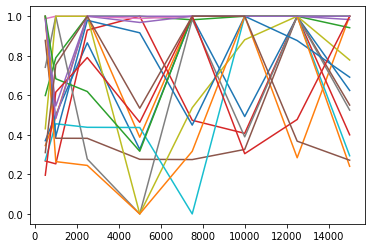

In [10]:
import matplotlib.pyplot as plt

for y in Y:
    plt.plot(X, y)

plt.show()

# TODO tukej moram dodat legendo da se bo dalo razbrat kateri parametri dajo recimo ok rešitev